# File information
NK- I couldnt get dropbox to work with google collab so I just downloaded the folder and ran it locally on my computer.

# Task information
### file naming conventions
data_mouse_conspecificType

### data structure for each file
3 dimensional numpy array (neurons, frames, trials)

### task structure
16 second trials recorded at 10 frames per second
stimulus is presented at @ 6 seconds or at the




In [ ]:

# Load data
import glob
import numpy as np
import os

directory_path =  "/content/data" #Set directory path to where you've uploaded the data
data_list = glob.glob(os.path.join(directory_path, "*")) #create a list of file paths for the defined animal
mouse_list = ["M1-1", "M1-3", "M1-4", "M2-3", "M2-4", "M3-1", "M3-2", "M3-3"]
## confirmation of data that will be processed
print("DATA TO BE PROCESSED:")
for file in data_list:
    array = np.load(file) #loading each file to get dimensions of data

    print(f"{file}, dimensions: {array.shape}")

CD1data = []
femdata = []

#data = [] #initialize list to store data
#labels = np.array([]) #initialize array to store labels



for mouse in mouse_list:
    for file in data_list:
        if mouse in file:
            if 'Fem' in file: #look for file that is specifically labeled Fem
                data_temp = np.load(file) #load the nparray into a temporary variable for concatenation
                femdata.append(data_temp) #store the data in the list
        #labels = np.concatenate((labels, np.ones(data_temp.shape[2])), axis = 0) #store the labels in an the array
            elif 'CD1' in file: #look for file that is specifically labeled CD1
                data_temp = np.load(file) #load the nparray into a temporary variable for concatenation
                CD1data.append(data_temp)
        #labels = np.concatenate((labels, np.zeros(data_temp.shape[2])), axis = 0)

print("Fem DATA CREATED, CONTENTS:")
for i, array in enumerate(femdata):
    print(f"Array {i}, dimensions: {array.shape}")

print("CD1 DATA CREATED, CONTENTS:")
for i, array in enumerate(CD1data):
    print(f"Array {i}, dimensions: {array.shape}")

#print("LABELS ARRAYS CREATED, CONTENTS:")
#print(labels)




DATA TO BE PROCESSED:
/content/data/11252023_M3-1_Fem.npy, dimensions: (315, 161, 4)
/content/data/11252023_M2-3_Fem.npy, dimensions: (265, 161, 4)
/content/data/11252024_M1-4_CD1.npy, dimensions: (60, 161, 4)
/content/data/11252024_M1-3_CD1.npy, dimensions: (72, 161, 4)
/content/data/11252024_M3-3_Fem.npy, dimensions: (309, 161, 4)
/content/data/11252024_M3-2_Fem.npy, dimensions: (30, 161, 4)
/content/data/11252024_M2-4_Fem.npy, dimensions: (97, 161, 4)
/content/data/11252024_M1-4_Fem.npy, dimensions: (60, 161, 4)
/content/data/11252023_M3-1_CD1.npy, dimensions: (315, 161, 4)
/content/data/11252023_M2-2_CD1.npy, dimensions: (148, 161, 4)
/content/data/11252023_M2-3_CD1.npy, dimensions: (265, 161, 4)
/content/data/11252024_M3-2_CD1.npy, dimensions: (30, 161, 4)
/content/data/11252024_M1-3_Fem.npy, dimensions: (72, 161, 4)
/content/data/11252024_M1-1_CD1.npy, dimensions: (142, 161, 4)
/content/data/11252024_M3-3_CD1.npy, dimensions: (309, 161, 4)
/content/data/11252023_M2-2_Fem.npy, dim

In [ ]:
# Vertically concatenate all arrays in femdata
femdata_concatenated = np.concatenate(femdata, axis=0)

# Print the dimensions of the concatenated array
print(f"Concatenated Fem data, dimensions: {femdata_concatenated.shape}")

# Vertically concatenate all arrays in CD1data
CD1data_concatenated = np.concatenate(CD1data, axis=0)

# Print the dimensions of the concatenated array
print(f"Concatenated CD1 data, dimensions: {CD1data_concatenated.shape}")

# Concatenate the two concatenated arrays horizontally
data = np.concatenate((femdata_concatenated, CD1data_concatenated), axis=1)

# Print the dimensions of the final data array
print(f"Final data array, dimensions: {data.shape}")

# average the data across the trials
data_avg = np.mean(data, axis=2)

#print the dimensions of the averaged data array
print(f"Average data array, dimensions: {data_avg.shape}")

Concatenated Fem data, dimensions: (1290, 161, 4)
Concatenated CD1 data, dimensions: (1290, 161, 4)
Final data array, dimensions: (1290, 322, 4)
Average data array, dimensions: (1290, 322)


In [ ]:
# Perform PCA on the averaged data
from sklearn.decomposition import PCA

pca = PCA(n_components=0.90)   #initialize PCA object with 90% variance explained
pca.fit(data_avg.T) #fit the PCA object to the data
num_pc = pca.n_components_ #get the number of principal components
coef = pca.components_ #get the principal components
print(f"NUMBER OF PRINCIPAL COMPONENTS: {num_pc}")


NUMBER OF PRINCIPAL COMPONENTS: 13


In [ ]:
# Initialize list to store transformed data
transformed_data = []

# Apply PCA transform to each 2D array in the third dimension of data
for i in range(data.shape[2]):
    transformed_data.append(pca.transform(data[:, :, i].T))

# Convert transformed_data to a numpy array
transformed_data = np.array(transformed_data)

# Print the shape of the transformed data
print(f"Transformed data shape: {transformed_data.shape}")

# Switch the first and third dimensions of transformed_data
reshaped_data = np.transpose(transformed_data, (2, 1, 0))

# Print the shape of the reshaped data
print(f"Reshaped data shape: {reshaped_data.shape}")


Transformed data shape: (4, 322, 13)
Reshaped data shape: (13, 322, 4)


In [ ]:
# Apply PCA transform to data_averg
transformed_data_avg = pca.transform(data_avg.T)
transformed_data_avg = np.transpose(transformed_data_avg)
# Print the shape of the transformed data
print(f"Transformed data_avg shape: {transformed_data_avg.shape}")



Transformed data_avg shape: (13, 322)


<ipython-input-15-26052bb9032c>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = cm.get_cmap('viridis')


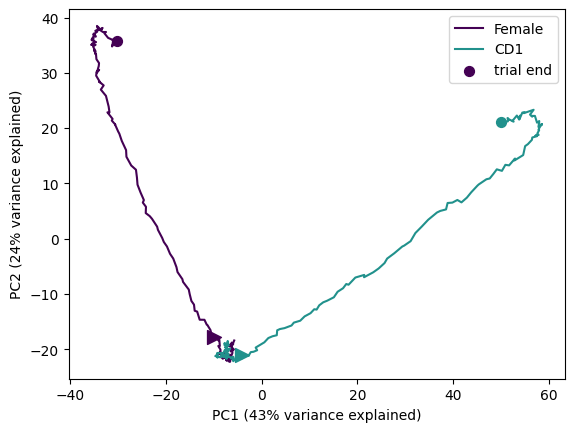

In [ ]:
#Plot Trajectory in 2D PC Space
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Get the 'viridis' colormap object
viridis = cm.get_cmap('viridis')

# Extract the first and second colors from the colormap
fem_color = viridis(0.0)
CD1_color = viridis(0.5)

# Plot the first two principal components
plt.figure()
plt.plot(transformed_data_avg[0, :160], transformed_data_avg[1, :160], color=fem_color, label='Female')
plt.plot(transformed_data_avg[0, 161:], transformed_data_avg[1, 161:], color=CD1_color, label='CD1')

# Add arrow marker at the 60th time point for both lines
plt.scatter(transformed_data_avg[0, 59], transformed_data_avg[1, 59], color=fem_color, marker='>', s=100)
plt.scatter(transformed_data_avg[0, 59+160], transformed_data_avg[1, 59+160], color=CD1_color, marker='>', s=100)
plt.scatter(transformed_data_avg[0, 160], transformed_data_avg[1, 160], color=fem_color, marker='o', s=50,label="trial end")
plt.scatter(transformed_data_avg[0, 321], transformed_data_avg[1, 321], color=CD1_color, marker='o', s=50)

plt.xlabel('PC1 (43% variance explained)')
plt.ylabel('PC2 (24% variance explained)')
plt.legend()
plt.show()

In [ ]:
#Split the data back up so we can pad it for smoothing
print (transformed_data_avg.shape)
fem_data_avg = transformed_data_avg[:, :161]
CD1_data_avg = transformed_data_avg[:, 161:]
print (fem_data_avg.shape)
print (CD1_data_avg.shape)

(13, 322)
(13, 161)
(13, 161)


<ipython-input-16-a9f4eabfac3d>:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = cm.get_cmap('viridis')


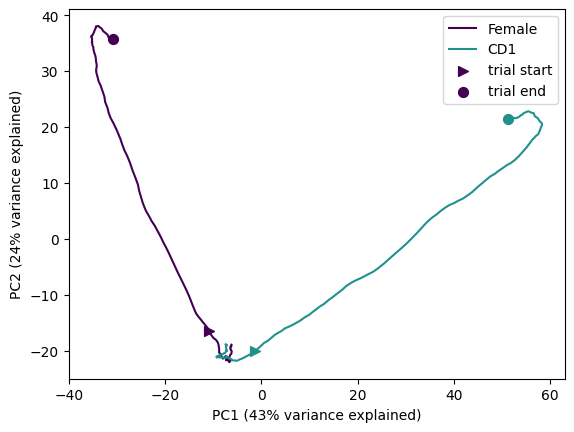

In [ ]:
#Plot Smoothed Trajectory in 2D PC Space (using Average Window Smoothing)
#Define a function for moving average smoothing
def moving_average(data, window_size):
    # Create an array of weights that are equally distributed across the window
    weights = np.ones(window_size) / window_size
    # Apply the convolution between data and weights to compute the moving average
    smoothed_data = np.convolve(data, weights, mode='valid')
    return smoothed_data

#Pad the data so you dont get funky edge smoothing
padding_width = 15
padded_fem_data = np.pad(fem_data_avg, ((0, 0), (padding_width, padding_width)), mode='reflect')
padded_CD1_data = np.pad(CD1_data_avg, ((0, 0), (padding_width, padding_width)), mode='reflect')

#Choose a window size
window_size = 5

# Apply smoothing to the data in the first two PCS
smoothed_fem_pad_data_0 = moving_average(padded_fem_data[0, :], window_size)
smoothed_fem_pad_data_1 = moving_average(padded_fem_data[1, :], window_size)
smoothed_CD1_pad_data_0 = moving_average(padded_CD1_data[0, :], window_size)
smoothed_CD1_pad_data_1 = moving_average(padded_CD1_data[1, :], window_size)


#Trim off the padding
smoothed_fem_data_0 = smoothed_fem_pad_data_0[padding_width:-padding_width]
smoothed_fem_data_1 = smoothed_fem_pad_data_1[padding_width:-padding_width]
smoothed_CD1_data_0 = smoothed_CD1_pad_data_0[padding_width:-padding_width]
smoothed_CD1_data_1 = smoothed_CD1_pad_data_1[padding_width:-padding_width]

# Get the 'viridis' colormap object
viridis = cm.get_cmap('viridis')

# Extract the first and second colors from the colormap
fem_color = viridis(0.0)
CD1_color = viridis(0.5)

# Plot the first two principal components
plt.plot(smoothed_fem_data_0, smoothed_fem_data_1, color=fem_color, label='Female')
plt.plot(smoothed_CD1_data_0, smoothed_CD1_data_1, color=CD1_color, label='CD1')


# Add arrow marker at trial start (60 frames) and end of trial
plt.scatter(smoothed_fem_data_0[60], smoothed_fem_data_1[60], color=fem_color, marker='>', s=50, label="trial start")
plt.scatter(smoothed_CD1_data_0[60], smoothed_CD1_data_1[60], color=CD1_color, marker='>', s=50)
plt.scatter(smoothed_fem_data_0[156], smoothed_fem_data_1[156], color=fem_color, marker='o', s=50,label="trial end")
plt.scatter(smoothed_CD1_data_0[156], smoothed_CD1_data_1[156], color=CD1_color, marker='o', s=50)


plt.xlabel('PC1 (43% variance explained)')
plt.ylabel('PC2 (24% variance explained)')
plt.legend()
plt.show()

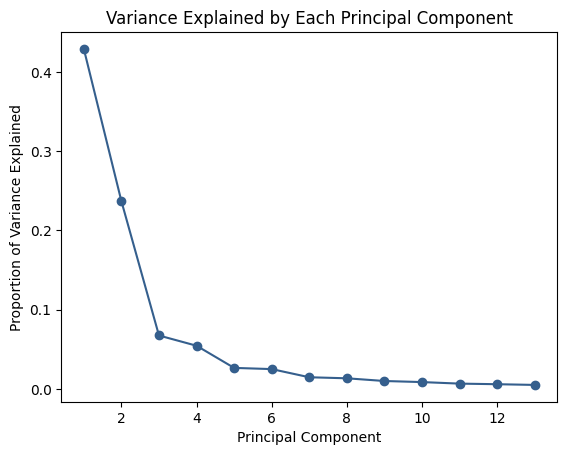

[0.42917916 0.23694808 0.06732807 0.05439957 0.02641929 0.02491091
 0.01460292 0.0132845  0.00986903 0.00850779 0.00656823 0.0058172
 0.00492146]


In [ ]:
explained_variance = pca.explained_variance_ratio_

plt.figure()
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', color=viridis(0.3))
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.title('Variance Explained by Each Principal Component')
plt.show()
print(explained_variance)

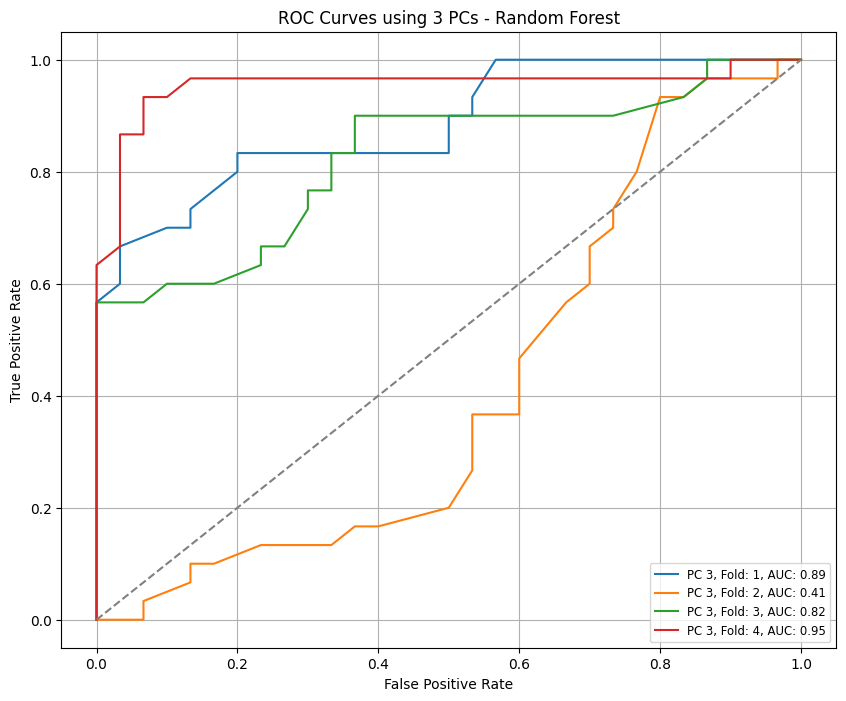

In [ ]:
#Use Random Forest Classifier and plot ROC
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve,accuracy_score, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

# Initialize a dictionaries to hold the AUCs and Accuracies for each PC number
aucs = {}
accuracies = {}
# Create a figure for the ROC curves
plt.figure(figsize=(10, 8))

# Loop through different numbers of PCs
for pcnum in range(1,11):
    aucs[pcnum] = []
    accuracies[pcnum] = []
    for i in range(4):
        temp_acc = []
        # Extract the training and testing data for the current fold
        fem_data_test = np.squeeze(femdata_concatenated[:, 60:90, i]).T
        CD1_data_test = np.squeeze(CD1data_concatenated[:, 60:90, i]).T

        fem_data_train = femdata_concatenated[:, 60:90, np.arange(4) != i]
        CD1_data_train = CD1data_concatenated[:, 60:90, np.arange(4) != i]
        fem_data_train = fem_data_train.reshape(-1, fem_data_train.shape[0])
        CD1_data_train = CD1_data_train.reshape(-1, CD1_data_train.shape[0])

        # Create training labels
        y_train = [0] * fem_data_train.shape[0] + [1] * CD1_data_train.shape[0]

        # Concatenate training data
        X_train = np.concatenate([fem_data_train, CD1_data_train])

        # Create testing labels
        y_test = [0] * fem_data_test.shape[0] + [1] * CD1_data_test.shape[0]

        # Concatenate testing data
        X_test = np.concatenate([fem_data_test, CD1_data_test])

        # Apply PCA transformation to the training data
        pca = PCA(n_components=pcnum)
        pca.fit(X_train)
        X_train = pca.transform(X_train)
        X_test = pca.transform(X_test)

        # Initialize and train a new classifier for this fold
        classifier = RandomForestClassifier(n_estimators=100)
        classifier.fit(X_train, y_train)

        #Get accuracies
        predictions = classifier.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        #print("Accuracy w/",pcnum,"PCs for trial",i, accuracy)
        accuracies[pcnum].append(accuracy)

        # Get probabilities for the positive class
        probabilities = classifier.predict_proba(X_test)[:, 1]

        # Calculate ROC curve and AUC
        fpr, tpr, _ = roc_curve(y_test, probabilities)
        auc = roc_auc_score(y_test, probabilities)
        aucs[pcnum].append(auc)

        # Plot the ROC curve for this fold and PC number
        if pcnum == 3:
          plt.plot(fpr, tpr, label=f'PC 3, Fold: {i + 1}, AUC: {auc:.2f}')

# Finalize ROC plot
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves using 3 PCs - Random Forest')
plt.legend(loc='lower right', fontsize='small')
plt.grid(True)
plt.show()


NameError: name 'accuracies' is not defined

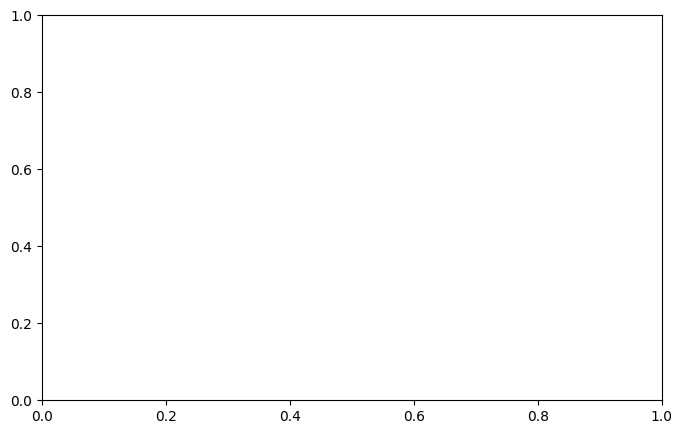

In [1]:
#Plot accuracies by PC
import matplotlib.pyplot as plt
import numpy as np

# Create a figure and axis
plt.figure(figsize=(8, 5))
ax = plt.gca()
#Store x axis labels, mean AUCs, SEs
x_labels=[]
mean_accs=[]
SE_accs=[]

# Find the average AUCs for each PC
for i, (pcnum, acc_list) in enumerate(accuracies.items()):
    mean_acc = np.mean(acc_list)
    standard_errors = [np.std(acc_list) / np.sqrt(len(acc_list))]
    print(f'Mean Accuracy Score for {pcnum} PCs: {mean_acc:.2f}')
    x_labels.append(str(pcnum))
    mean_accs.append(mean_acc)
    for j,acc in enumerate(acc_list):
      temp_color = viridis(j/len(acc_list))
      ax.scatter(i, acc, color=temp_color, alpha=0.8, label=f'Trial {j+1}' if i==0 else"")

ax.bar(x_labels, mean_accs,width=0.5, color=(0,0,0,0), edgecolor="black")
ax.errorbar(x_labels, mean_accs, yerr=standard_errors, fmt='none',alpha=0.7, color='gray', capsize=5, label='')
ax.set_ylim(0,1)
# Adding labels and title
plt.xlabel('Principal Components')
plt.ylabel('Accuracy Scores')

plt.title('Accuracy Scores by Number of Principal Components Used - Random Forest')
plt.xticks(x_labels)  # Set the x-ticks to be the principal component labels
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

Mean AUC for 1 PCs: 0.58
Mean AUC for 2 PCs: 0.61
Mean AUC for 3 PCs: 0.77
Mean AUC for 4 PCs: 0.79
Mean AUC for 5 PCs: 0.71
Mean AUC for 6 PCs: 0.81
Mean AUC for 7 PCs: 0.84
Mean AUC for 8 PCs: 0.65
Mean AUC for 9 PCs: 0.68
Mean AUC for 10 PCs: 0.49


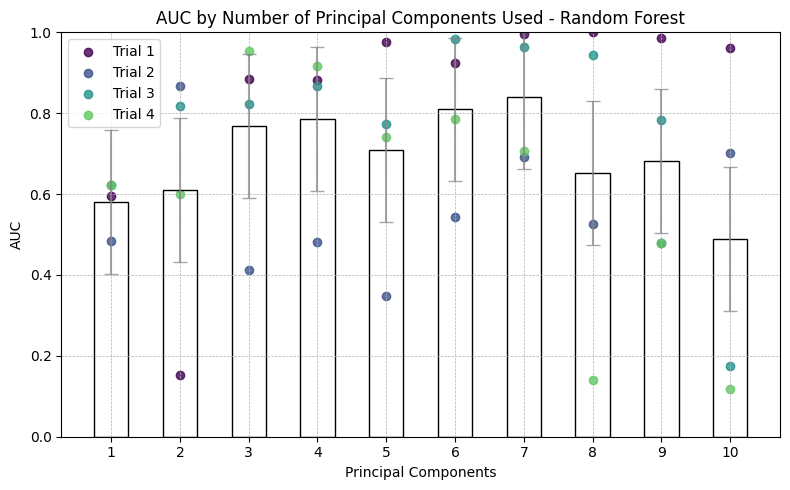

In [ ]:
##Plotting mean AUCs by PCs used
# Create a figure and axis
plt.figure(figsize=(8, 5))
ax = plt.gca()
#Store x axis labels, mean AUCs, SEs
x_labels=[]
mean_aucs=[]
SE_aucs=[]

# Find the average AUCs for each PC
for i, (pcnum, auc_list) in enumerate(aucs.items()):
    mean_auc = np.mean(auc_list)
    standard_errors = [np.std(auc_list) / np.sqrt(len(auc_list))]
    print(f'Mean AUC for {pcnum} PCs: {mean_auc:.2f}')
    x_labels.append(str(pcnum))
    mean_aucs.append(mean_auc)
    for j,auc in enumerate(auc_list):
      temp_color = viridis(j/len(auc_list))
      ax.scatter(i, auc, color=temp_color, alpha=0.8, label=f'Trial {j+1}' if i==0 else"")

ax.bar(x_labels, mean_aucs,width=0.5, color=(0,0,0,0), edgecolor="black")
ax.errorbar(x_labels, mean_aucs, yerr=standard_errors, fmt='none',alpha=0.7, color='gray', capsize=5, label='')
ax.set_ylim(0,1)
# Adding labels and title
plt.xlabel('Principal Components')
plt.ylabel('AUC')

plt.title('AUC by Number of Principal Components Used - Random Forest')
plt.xticks(x_labels)  # Set the x-ticks to be the principal component labels
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

Accuracy w/ 1 PCs for trial 0 0.5
Accuracy w/ 1 PCs for trial 1 0.36666666666666664
Accuracy w/ 1 PCs for trial 2 0.5
Accuracy w/ 1 PCs for trial 3 0.5
Accuracy w/ 2 PCs for trial 0 0.5
Accuracy w/ 2 PCs for trial 1 0.5
Accuracy w/ 2 PCs for trial 2 0.5
Accuracy w/ 2 PCs for trial 3 0.5
Accuracy w/ 3 PCs for trial 0 0.5
Accuracy w/ 3 PCs for trial 1 0.5
Accuracy w/ 3 PCs for trial 2 0.48333333333333334
Accuracy w/ 3 PCs for trial 3 0.75
Accuracy w/ 4 PCs for trial 0 0.5
Accuracy w/ 4 PCs for trial 1 0.08333333333333333
Accuracy w/ 4 PCs for trial 2 0.36666666666666664
Accuracy w/ 4 PCs for trial 3 0.6166666666666667
Accuracy w/ 5 PCs for trial 0 0.48333333333333334
Accuracy w/ 5 PCs for trial 1 0.5
Accuracy w/ 5 PCs for trial 2 0.5
Accuracy w/ 5 PCs for trial 3 0.9333333333333333
Accuracy w/ 6 PCs for trial 0 0.48333333333333334
Accuracy w/ 6 PCs for trial 1 0.5
Accuracy w/ 6 PCs for trial 2 0.5
Accuracy w/ 6 PCs for trial 3 0.9
Accuracy w/ 7 PCs for trial 0 0.5
Accuracy w/ 7 PCs for t

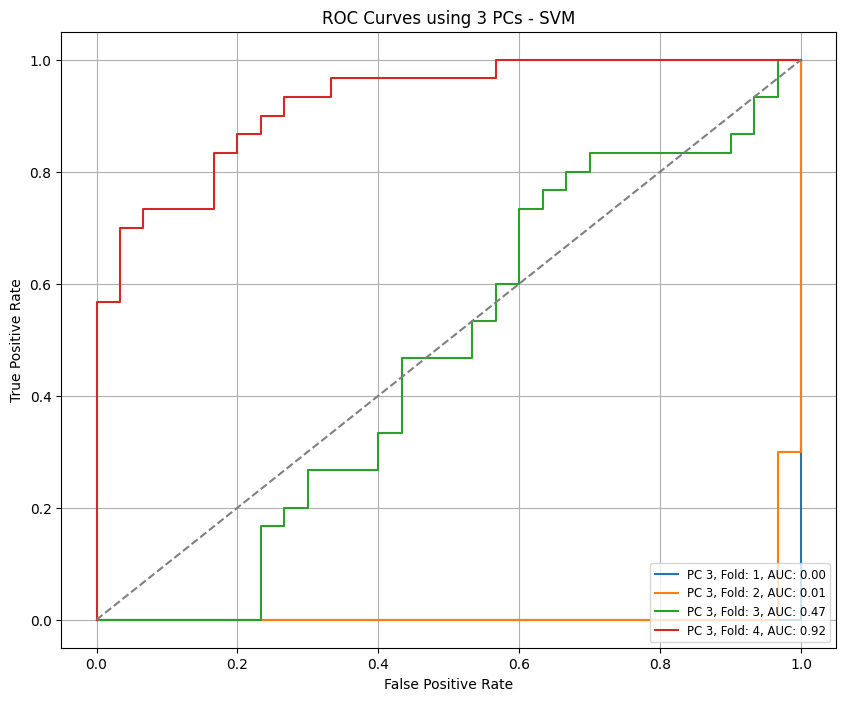

In [ ]:
#Use SVM (Linear) Classifier and plot ROC
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve,accuracy_score, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

# Initialize a dictionary to hold the AUCs and Accuracy Scores for each PC number
aucs = {}
accuracies = {}

# Create a figure for the ROC curves
plt.figure(figsize=(10, 8))

# Loop through different numbers of PCs
for pcnum in range(1,11):
    aucs[pcnum] = []
    accuracies[pcnum]=[]
    for i in range(4):
        # Extract the training and testing data for the current fold
        fem_data_test = np.squeeze(femdata_concatenated[:, 60:90, i]).T
        CD1_data_test = np.squeeze(CD1data_concatenated[:, 60:90, i]).T

        fem_data_train = femdata_concatenated[:, 60:90, np.arange(4) != i]
        CD1_data_train = CD1data_concatenated[:, 60:90, np.arange(4) != i]
        fem_data_train = fem_data_train.reshape(-1, fem_data_train.shape[0])
        CD1_data_train = CD1_data_train.reshape(-1, CD1_data_train.shape[0])

        # Create training labels
        y_train = [0] * fem_data_train.shape[0] + [1] * CD1_data_train.shape[0]

        # Concatenate training data
        X_train = np.concatenate([fem_data_train, CD1_data_train])

        # Create testing labels
        y_test = [0] * fem_data_test.shape[0] + [1] * CD1_data_test.shape[0]

        # Concatenate testing data
        X_test = np.concatenate([fem_data_test, CD1_data_test])

        # Apply PCA transformation to the training data
        pca = PCA(n_components=pcnum)
        pca.fit(X_train)
        X_train = pca.transform(X_train)
        X_test = pca.transform(X_test)

        # Initialize and train a new classifier for this fold
        classifier = svm.SVC(kernel='linear')
        classifier.fit(X_train, y_train)
        predictions = classifier.predict(X_test)

        #Get accuracies
        accuracy = accuracy_score(y_test, predictions)
        print("Accuracy w/",pcnum,"PCs for trial",i, accuracy)
        accuracies[pcnum].append(accuracy)

        # Test the classifier using decision function
        decision_scores = classifier.decision_function(X_test)

        # Calculate ROC curve and AUC
        fpr, tpr, _ = roc_curve(y_test, decision_scores)
        auc = roc_auc_score(y_test, decision_scores)
        aucs[pcnum].append(auc)

        # Plot the ROC curve for this fold and PC number
        if pcnum == 3:
          plt.plot(fpr, tpr, label=f'PC 3, Fold: {i + 1}, AUC: {auc:.2f}')

# Finalize ROC plot
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves using 3 PCs - SVM')
plt.legend(loc='lower right', fontsize='small')
plt.grid(True)
plt.show()

Mean Accuracy Score for 1 PCs: 0.47
Mean Accuracy Score for 2 PCs: 0.50
Mean Accuracy Score for 3 PCs: 0.56
Mean Accuracy Score for 4 PCs: 0.39
Mean Accuracy Score for 5 PCs: 0.60
Mean Accuracy Score for 6 PCs: 0.60
Mean Accuracy Score for 7 PCs: 0.56
Mean Accuracy Score for 8 PCs: 0.58
Mean Accuracy Score for 9 PCs: 0.49
Mean Accuracy Score for 10 PCs: 0.47


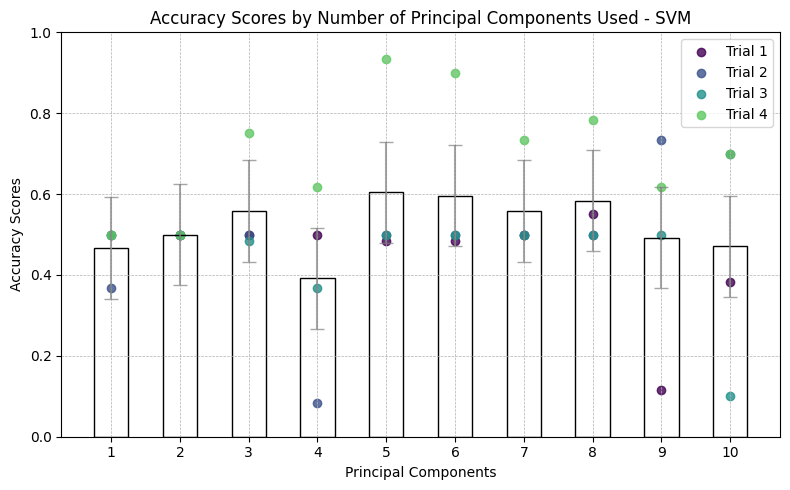

In [ ]:
#Plot accuracies by PC
import matplotlib.pyplot as plt
import numpy as np

# Create a figure and axis
plt.figure(figsize=(8, 5))
ax = plt.gca()
#Store x axis labels, mean AUCs, SEs
x_labels=[]
mean_accs=[]
SE_accs=[]

# Find the average AUCs for each PC
for i, (pcnum, acc_list) in enumerate(accuracies.items()):
    mean_acc = np.mean(acc_list)
    standard_errors = [np.std(acc_list) / np.sqrt(len(acc_list))]
    print(f'Mean Accuracy Score for {pcnum} PCs: {mean_acc:.2f}')
    x_labels.append(str(pcnum))
    mean_accs.append(mean_acc)
    for j,acc in enumerate(acc_list):
      temp_color = viridis(j/len(acc_list))
      ax.scatter(i, acc, color=temp_color, alpha=0.8, label=f'Trial {j+1}' if i==0 else"")

ax.bar(x_labels, mean_accs,width=0.5, color=(0,0,0,0), edgecolor="black")
ax.errorbar(x_labels, mean_accs, yerr=standard_errors, fmt='none',alpha=0.7, color='gray', capsize=5, label='')
ax.set_ylim(0,1)
# Adding labels and title
plt.xlabel('Principal Components')
plt.ylabel('Accuracy Scores')

plt.title('Accuracy Scores by Number of Principal Components Used - SVM')
plt.xticks(x_labels)  # Set the x-ticks to be the principal component labels
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
np.mean(mean_acc)

0.4708333333333333

Mean AUC for 1 PCs: 0.35
Mean AUC for 2 PCs: 0.10
Mean AUC for 3 PCs: 0.35
Mean AUC for 4 PCs: 0.33
Mean AUC for 5 PCs: 0.52
Mean AUC for 6 PCs: 0.50
Mean AUC for 7 PCs: 0.49
Mean AUC for 8 PCs: 0.71
Mean AUC for 9 PCs: 0.57
Mean AUC for 10 PCs: 0.53


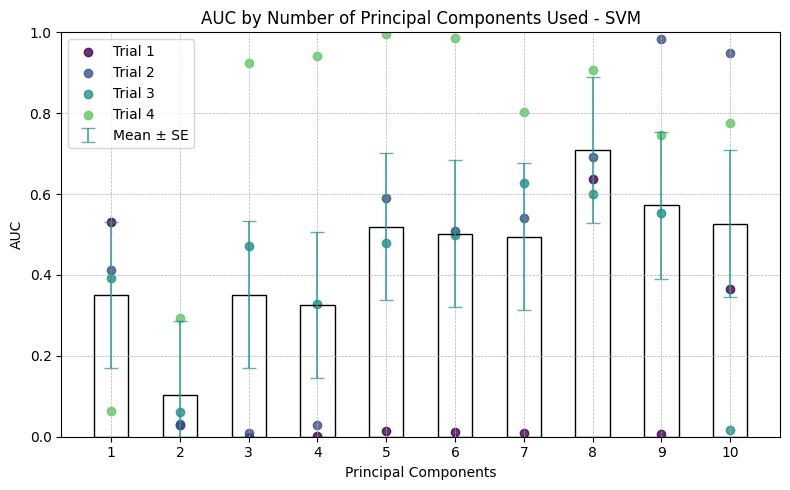

In [ ]:
##Plotting mean AUCs by PCs used
# Create a figure and axis
plt.figure(figsize=(8, 5))
ax = plt.gca()
#Store x axis labels, mean AUCs, SEs
x_labels=[]
mean_aucs=[]
SE_aucs=[]

# Find the average AUCs for each PC
for i, (pcnum, auc_list) in enumerate(aucs.items()):
    mean_auc = np.mean(auc_list)
    standard_errors = [np.std(auc_list) / np.sqrt(len(auc_list))]
    print(f'Mean AUC for {pcnum} PCs: {mean_auc:.2f}')
    x_labels.append(str(pcnum))
    mean_aucs.append(mean_auc)
    for j,auc in enumerate(auc_list):
      temp_color = viridis(j/len(auc_list))
      ax.scatter(i, auc, color=temp_color, alpha=0.8, label=f'Trial {j+1}' if i==0 else"")

ax.bar(x_labels, mean_aucs,width=0.5, color=(0,0,0,0), edgecolor="black")
ax.errorbar(x_labels, mean_aucs, yerr=standard_errors, fmt='none',alpha=0.7, color=viridis(0.5), capsize=5, label='Mean ± SE')
ax.set_ylim(0,1)
# Adding labels and title
plt.xlabel('Principal Components')
plt.ylabel('AUC')

plt.title('AUC by Number of Principal Components Used - SVM')
plt.xticks(x_labels)  # Set the x-ticks to be the principal component labels
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
#Create Time Series of decoding accuracy

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

pc_accuracies = []

T = 140

timeseries = []

for frame in range(T):

    temp_time = []

    for i in range(4):


        temp_acc = []

        fem_data_test = np.squeeze(femdata_concatenated[:, frame:frame+10, i]).T
        CD1_data_test = np.squeeze(CD1data_concatenated[:, frame:frame+10, i]).T

        fem_data_train = femdata_concatenated[:, frame:frame+10, np.arange(4) != i]
        CD1_data_train = CD1data_concatenated[:, frame:frame+10, np.arange(4) != i]
        fem_data_train = fem_data_train.reshape(-1, fem_data_train.shape[0])
        CD1_data_train = CD1_data_train.reshape(-1, CD1_data_train.shape[0])

        # z-score train datar
        # fem_data_train = (fem_data_train - np.mean(fem_data_train, axis=0)) / np.std(fem_data_train, axis=0)
        # CD1_data_train = (CD1_data_train - np.mean(CD1_data_train, axis=0)) / np.std(CD1_data_train, axis=0)

        # # z-score test data
        # fem_data_test = (fem_data_test - np.mean(fem_data_test, axis=0)) / np.std(fem_data_test, axis=0)
        # CD1_data_test = (CD1_data_test - np.mean(CD1_data_test, axis=0)) / np.std(CD1_data_test, axis=0)


    # fem_data_reshaped = fem_data.reshape(-1, fem_data.shape[0])
    # CD1_data_reshaped = CD1_data.reshape(-1, CD1_data.shape[0])

    # Create labels for the data
    # Assuming you have equal number of trials for each dataset
        labels = [0] * fem_data_train.shape[0] + [1] * CD1_data_train.shape[0]


        # Concatenate the data from both datasets
        X_train = np.concatenate([fem_data_train, CD1_data_train])
        y_train = labels


        #fem_data_test = fem_data_test.reshape(1,-1)
        #CD1_data_test = CD1_data_test.reshape(1,-1)

        X_test = np.concatenate([fem_data_test, CD1_data_test])
        y_test = [0] * fem_data_test.shape[0] + [1] * CD1_data_test.shape[0]

        pca = PCA(n_components=.90)


        pca.fit(X_train)
        X_train = pca.transform(X_train)
        X_test = pca.transform(X_test)


        #Shuffling testing data/labels
        #indices = np.arange(X_test.shape[0])
        #np.random.shuffle(indices)

        #X_test = X_test[indices]
        #y_test = np.array(testlabels)[indices]

#for cv in range(4):

    # Initialize Random Forest classifier
        classifier = RandomForestClassifier(n_estimators=100)

    # Train the classifier
        classifier.fit(X_train, labels)

    # Test the classifier
        predictions = classifier.predict(X_test)

    # Evaluate performance
        accuracy = accuracy_score(y_test, predictions)
        print("Accuracy:", frame, accuracy)

        temp_acc.append(accuracy)
    #print(predictions)
    #print(y_test)
        #pc_accuracies.append(temp_acc)
    temp_time.append(np.mean(temp_acc))
    timeseries.append(temp_time)
#print(pc_accuracies)

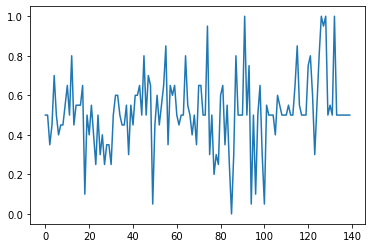

In [ ]:
import matplotlib.pyplot as plt
plt.plot(timeseries)